<a href="https://colab.research.google.com/github/Harithanush/EmotionDetection/blob/main/XGBoostTransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
with zipfile.ZipFile('/content/archive (1) (1).zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')


In [ ]:
pip install DeepFace

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=7dca8282dfd2d42ae8644fff5066ef666cab108ebbf51d41ecaa24a261faf5d3
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


In [ ]:
pip install scikit-learn


In [ ]:
pip install tensorflow keras scikit-learn xgboost


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 1097s 988ms/step - accuracy: 0.3412 - loss: 1.6615 - val_accuracy: 0.4074 - val_loss: 1.5190
Epoch 2/10
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 1082s 971ms/step - accuracy: 0.4079 - loss: 1.5293 - val_accuracy: 0.4244 - val_loss: 1.4846
Epoch 3/10
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 1067s 963ms/step - accuracy: 0.4198 - loss: 1.4874 - val_accuracy: 0.4465 - val_loss: 1.4430
Epoch 4/10
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 1119s 979ms/step - accuracy: 0.4419 - loss: 1.4556 - val_accuracy: 0.4615 - val_loss: 1.4101
Epoch 5/10
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 1087s 966ms/step - accuracy: 0.4529 - loss: 1.4250 - val_accuracy: 0.4751 - val_loss: 1.3799
Epoch 6/10
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 1138s 998ms/step - accuracy: 0.4722 - loss: 1.3916 - val_accuracy: 0.4877 - val_loss: 1.3485
Epoch 7/10
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 1151s 989ms/step - accuracy: 0.4857 - loss: 1.3584 - val_accuracy: 0.5028 - val_loss: 1.3215
Epoc

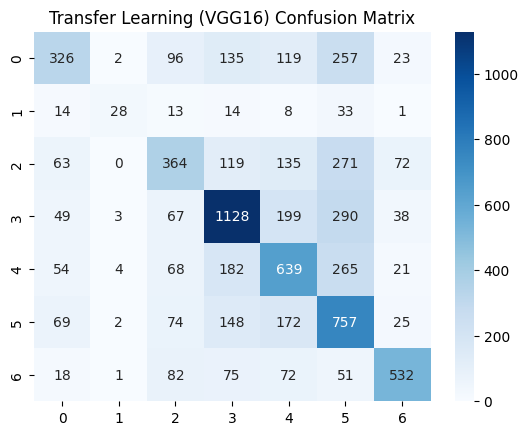


Classification Report:
               precision    recall  f1-score   support

       angry       0.55      0.34      0.42       958
     disgust       0.70      0.25      0.37       111
        fear       0.48      0.36      0.41      1024
       happy       0.63      0.64      0.63      1774
     neutral       0.48      0.52      0.50      1233
         sad       0.39      0.61      0.48      1247
    surprise       0.75      0.64      0.69       831

    accuracy                           0.53      7178
   macro avg       0.57      0.48      0.50      7178
weighted avg       0.54      0.53      0.52      7178



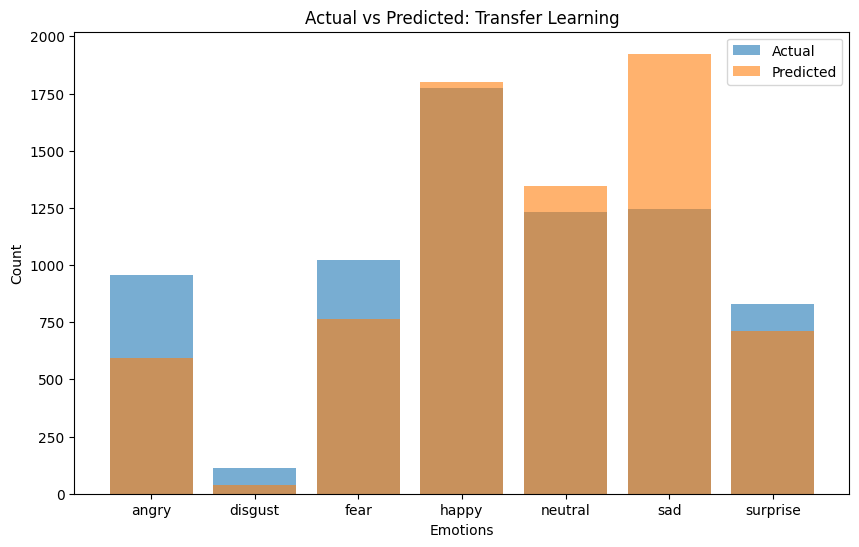

XGBoost Accuracy: 94.05%


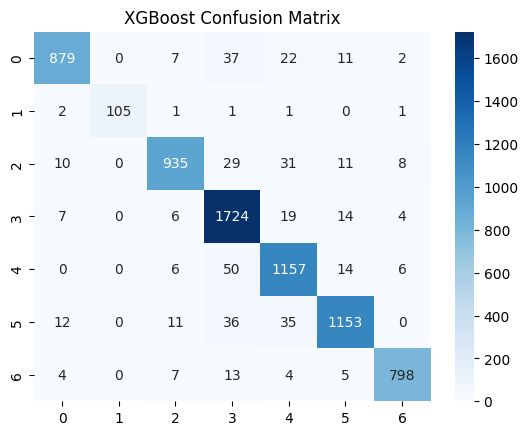


Classification Report:
               precision    recall  f1-score   support

       angry       0.96      0.92      0.94       958
     disgust       1.00      0.95      0.97       111
        fear       0.96      0.91      0.94      1024
       happy       0.91      0.97      0.94      1774
     neutral       0.91      0.94      0.92      1233
         sad       0.95      0.92      0.94      1247
    surprise       0.97      0.96      0.97       831

    accuracy                           0.94      7178
   macro avg       0.95      0.94      0.95      7178
weighted avg       0.94      0.94      0.94      7178



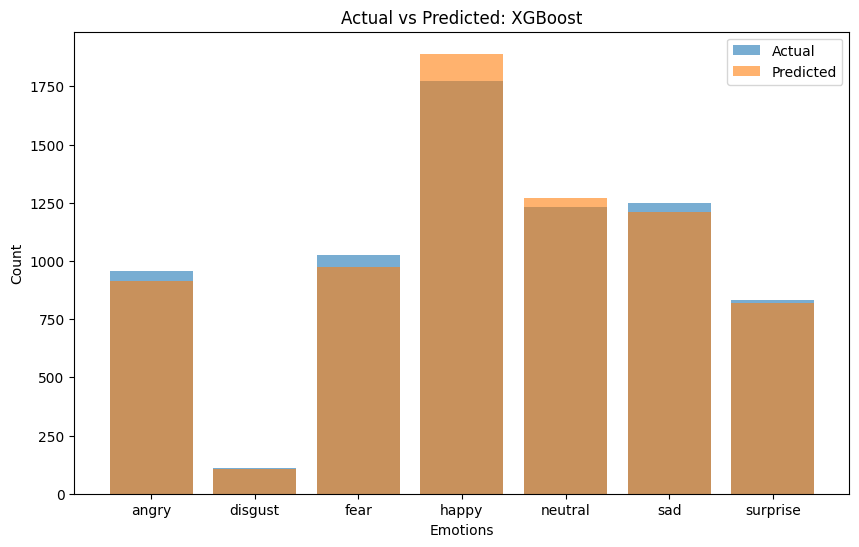

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC


# ---- Helper Functions ----
def load_images_for_model(folder, target_size=(48, 48)):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, target_size)
            if img is not None:
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

def evaluate_model(model, X_test, y_test, model_name="Model", is_transfer_learning=False):
    if is_transfer_learning:
        y_pred_prob = model.predict(X_test)
        y_pred = np.argmax(y_pred_prob, axis=1)
    else:
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    return y_pred

def plot_actual_vs_predicted(y_true, y_pred, title):
    actual_counts = np.unique(y_true, return_counts=True)[1]
    predicted_counts = np.unique(y_pred, return_counts=True)[1]

    emotions = label_encoder.classes_

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(emotions, actual_counts, alpha=0.6, label='Actual')
    ax.bar(emotions, predicted_counts, alpha=0.6, label='Predicted')
    plt.title(f"Actual vs Predicted: {title}")
    plt.xlabel("Emotions")
    plt.ylabel("Count")
    plt.legend()
    plt.show()

def preprocess_image(image_path, target_size=(48, 48)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, target_size)
    img = img.astype('float32') / 255.0
    return img.reshape(1, target_size[0], target_size[1], 1)

def predict_single_image(image_path, model, is_transfer_learning=False):
    img = preprocess_image(image_path)
    if is_transfer_learning:
        img = np.repeat(img, 3, axis=-1)  # Convert grayscale to RGB for transfer learning models
        y_pred_prob = model.predict(img)
        y_pred = np.argmax(y_pred_prob, axis=1)
    else:
        y_pred = model.predict(img)
    return label_encoder.inverse_transform(y_pred)[0]

# ---- Load Data ----
train_dir = '/content/train'
val_dir = '/content/test'
X_train, y_train = load_images_for_model(train_dir)
X_test, y_test = load_images_for_model(val_dir)

# Normalize data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_train_encoded_categorical = to_categorical(y_train_encoded)
y_test_encoded_categorical = to_categorical(y_test_encoded)

# ---- Transfer Learning with VGG16 ----
def build_transfer_learning_model():
    vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
    for layer in vgg_base.layers:
        layer.trainable = False

    x = Flatten()(vgg_base.output)
    x = Dense(128, activation='relu')(x)
    output = Dense(len(np.unique(y_train_encoded)), activation='softmax')(x)
    model = Model(inputs=vgg_base.input, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Adjust input dimensions for VGG16 (convert grayscale to RGB)
X_train_rgb = np.repeat(X_train.reshape(-1, 48, 48, 1), 3, axis=-1)
X_test_rgb = np.repeat(X_test.reshape(-1, 48, 48, 1), 3, axis=-1)

transfer_model = build_transfer_learning_model()
transfer_model.fit(X_train_rgb, y_train_encoded_categorical, epochs=10, validation_data=(X_test_rgb, y_test_encoded_categorical))

y_pred_transfer = evaluate_model(transfer_model, X_test_rgb, y_test_encoded, "Transfer Learning (VGG16)", is_transfer_learning=True)
plot_actual_vs_predicted(y_test_encoded, y_pred_transfer, "Transfer Learning")

# ---- XGBoost Classifier ----
xgb = XGBClassifier()
xgb.fit(X_train.reshape(-1, 48*48), y_train_encoded)
y_pred_xgb = evaluate_model(xgb, X_test.reshape(-1, 48*48), y_test_encoded, "XGBoost")
plot_actual_vs_predicted(y_test_encoded, y_pred_xgb, "XGBoost")